<a href="https://colab.research.google.com/github/daynoh/Deep-learning-using-Tensorflow/blob/master/Google_stock_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 450kB 37.8MB/s 
     |████████████████████████████████| 3.9MB 39.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3b6b53c5bef372bf3756ffeceec58e2119f4f22f89096db77faa0db3c382e4d2
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Fo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('GOOGl.csv',date_parser = True)
data.shape
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [ ]:
# Data preprocessing

data_train = data[data['Date']<'2019-01-01']
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [ ]:
data_test = data[data['Date']>='2019-01-01']
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3938,2020-04-13,1209.180054,1220.510010,1187.598022,1217.560059,1217.560059,1739800
3939,2020-04-14,1245.089966,1282.069946,1236.930054,1269.229980,1269.229980,2470400
3940,2020-04-15,1245.609985,1280.459961,1240.400024,1262.469971,1262.469971,1671700
3941,2020-04-16,1274.099976,1279.000000,1242.619995,1263.469971,1263.469971,2507100


In [ ]:
training_data = data_train.drop(['Date','Adj Close'], axis =1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [ ]:
X_train = []
y_train = []

for i in range(10,training_data.shape[0]):
    X_train.append(training_data[i-10:i])
    y_train.append(training_data[i,0])

    

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape, y_train.shape
X_train[1]

array([[7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       [4.91367646e-03, 4.01532941e-03, 3.15578542e-03, 1.98678849e-03,
        1.85522018e-01],
       [2.35285614e-03, 2.54928676e-03, 3.28434064e-03, 2.44873974e-03,
        1.11762967e-01],
       [2.34877785e-03, 2.52892558e-03, 3.60779701e-03, 3.22955376e-03,
        8.62763771e-02],
       [3.63326671e-03, 2.80177162e-03, 4.03492722e-03, 2.51005881e-03,
        7.55243925e-02],
       [2.48334262e-03, 1.52712947e-03, 2.50886935e-03, 8.17608079e-04,
        6.31682127e-02],
       [1.26817570e-03, 8.02253103e-04, 2.57107531e-03, 9.64778600e-04,
        5.97732318e-02],
       [1.43128522e-03, 5.00900100e-04, 1.53849690e-03, 9.81131336e-05,
        1.11151095e-01],
       [0.00000000e+00, 2.56557750e-04, 1.23577446e-03, 6.13207085e-04,
        1.83955383e-01]])

### Building LSTM

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 360,activation = 'relu', return_sequences = True, input_shape= (X_train.shape[1],5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 270,activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 200,activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 180,activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))


             
              

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 360)           527040    
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 360)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 270)           681480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 270)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10, 200)           376800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 200)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 180)              

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs = 10, batch_size= 32)

Epoch 1/10
113/113 [==============================] - 7s 59ms/step - loss: 0.0122
Epoch 2/10
113/113 [==============================] - 7s 59ms/step - loss: 0.0035
Epoch 3/10
113/113 [==============================] - 7s 58ms/step - loss: 0.0032
Epoch 4/10
113/113 [==============================] - 7s 58ms/step - loss: 0.0028
Epoch 5/10
113/113 [==============================] - 6s 57ms/step - loss: 0.0031
Epoch 6/10
113/113 [==============================] - 7s 58ms/step - loss: 0.0026
Epoch 7/10
113/113 [==============================] - 7s 59ms/step - loss: 0.0025
Epoch 8/10
113/113 [==============================] - 7s 58ms/step - loss: 0.0024
Epoch 9/10
113/113 [==============================] - 6s 57ms/step - loss: 0.0020
Epoch 10/10
113/113 [==============================] - 6s 57ms/step - loss: 0.0018


### Preparing test dataset

In [ ]:
past_10_days = data_train.tail(10)

In [ ]:
df = past_10_days.append(data_test, ignore_index = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-17,1037.510010,1053.150024,1007.900024,1016.530029,1016.530029,2385400
1,2018-12-18,1026.089966,1049.479980,1021.440002,1028.709961,1028.709961,2192500
2,2018-12-19,1033.989990,1062.000000,1008.049988,1023.010010,1023.010010,2479300
3,2018-12-20,1018.130005,1034.219971,996.359985,1009.409973,1009.409973,2673500
4,2018-12-21,1015.299988,1024.020020,973.690002,979.539978,979.539978,4596000
...,...,...,...,...,...,...,...
331,2020-04-13,1209.180054,1220.510010,1187.598022,1217.560059,1217.560059,1739800
332,2020-04-14,1245.089966,1282.069946,1236.930054,1269.229980,1269.229980,2470400
333,2020-04-15,1245.609985,1280.459961,1240.400024,1262.469971,1262.469971,1671700
334,2020-04-16,1274.099976,1279.000000,1242.619995,1263.469971,1263.469971,2507100


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1037.510010,1053.150024,1007.900024,1016.530029,2385400
1,1026.089966,1049.479980,1021.440002,1028.709961,2192500
2,1033.989990,1062.000000,1008.049988,1023.010010,2479300
3,1018.130005,1034.219971,996.359985,1009.409973,2673500
4,1015.299988,1024.020020,973.690002,979.539978,4596000


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.8088639 , 0.81954039, 0.79927061, 0.79335452, 0.02880645],
       [0.79951539, 0.81654006, 0.81054247, 0.80335027, 0.02646922],
       [0.80598239, 0.82677544, 0.79939545, 0.79867247, 0.02994417],
       ...,
       [0.9792156 , 1.00537107, 0.99282396, 0.99519087, 0.02015906],
       [1.00253766, 1.00417752, 0.99467206, 0.99601154, 0.030281  ],
       [1.01133766, 1.01679192, 1.01848951, 1.01224448, 0.02350558]])

In [ ]:
X_test = []
y_test = []

In [ ]:
for i in range (10, inputs.shape[0]):
  X_test.append(inputs[i-10:i])
  y_test.append(inputs[i,0])


In [ ]:
X_test,y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((326, 10, 5), (326,))

In [ ]:
y_pred  = regressor.predict(X_test)

In [ ]:
# inverse scaling to get results we want

scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [ ]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [ ]:
y_pred = y_pred* scale
y_test = y_test * scale

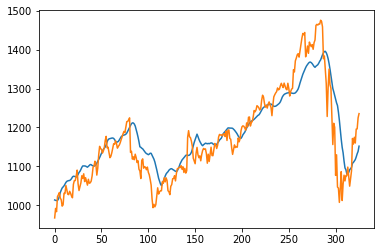

In [ ]:
y_pred = np.array(y_pred)
y_test
plt.plot(y_pred)
plt.plot(y_test)

### Visualization


<function matplotlib.pyplot.show>

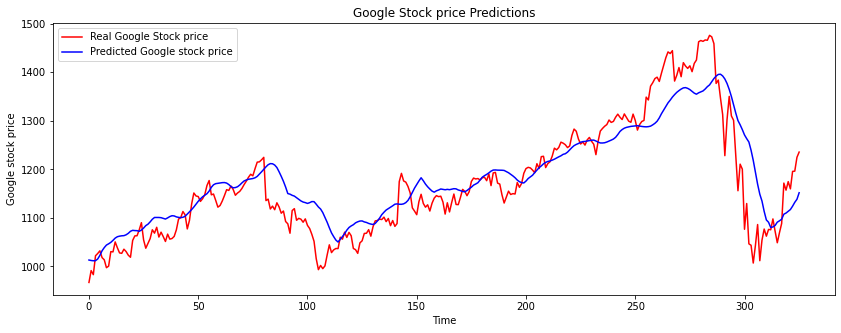

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google stock price')
plt.title('Google Stock price Predictions')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show